# **Imports**

In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.transform import resize

import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# **Data Loader**

In [2]:
dir_train = './train'
dir_test = './test'

In [3]:
CATEGORIES = os.listdir(dir_test)[:2] # get the first 10 values in the folder
CATEGORIES

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions']

In [4]:
NUM_CATEGORIES = len(CATEGORIES)
NUM_CATEGORIES

2

The shape of the image in category Acne and Rosacea Photos is: (720, 487, 3)
The shape of the image in category Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions is: (472, 720, 3)
The shape of the image in category Atopic Dermatitis Photos is: (472, 720, 3)
The shape of the image in category Bullous Disease Photos is: (497, 720, 3)
The shape of the image in category Cellulitis Impetigo and other Bacterial Infections is: (472, 720, 3)
The shape of the image in category Eczema Photos is: (472, 720, 3)
The shape of the image in category Exanthems and Drug Eruptions is: (487, 720, 3)
The shape of the image in category Hair Loss Photos Alopecia and other Hair Diseases is: (480, 720, 3)
The shape of the image in category Herpes HPV and other STDs Photos is: (479, 720, 3)
The shape of the image in category Light Diseases and Disorders of Pigmentation is: (488, 720, 3)


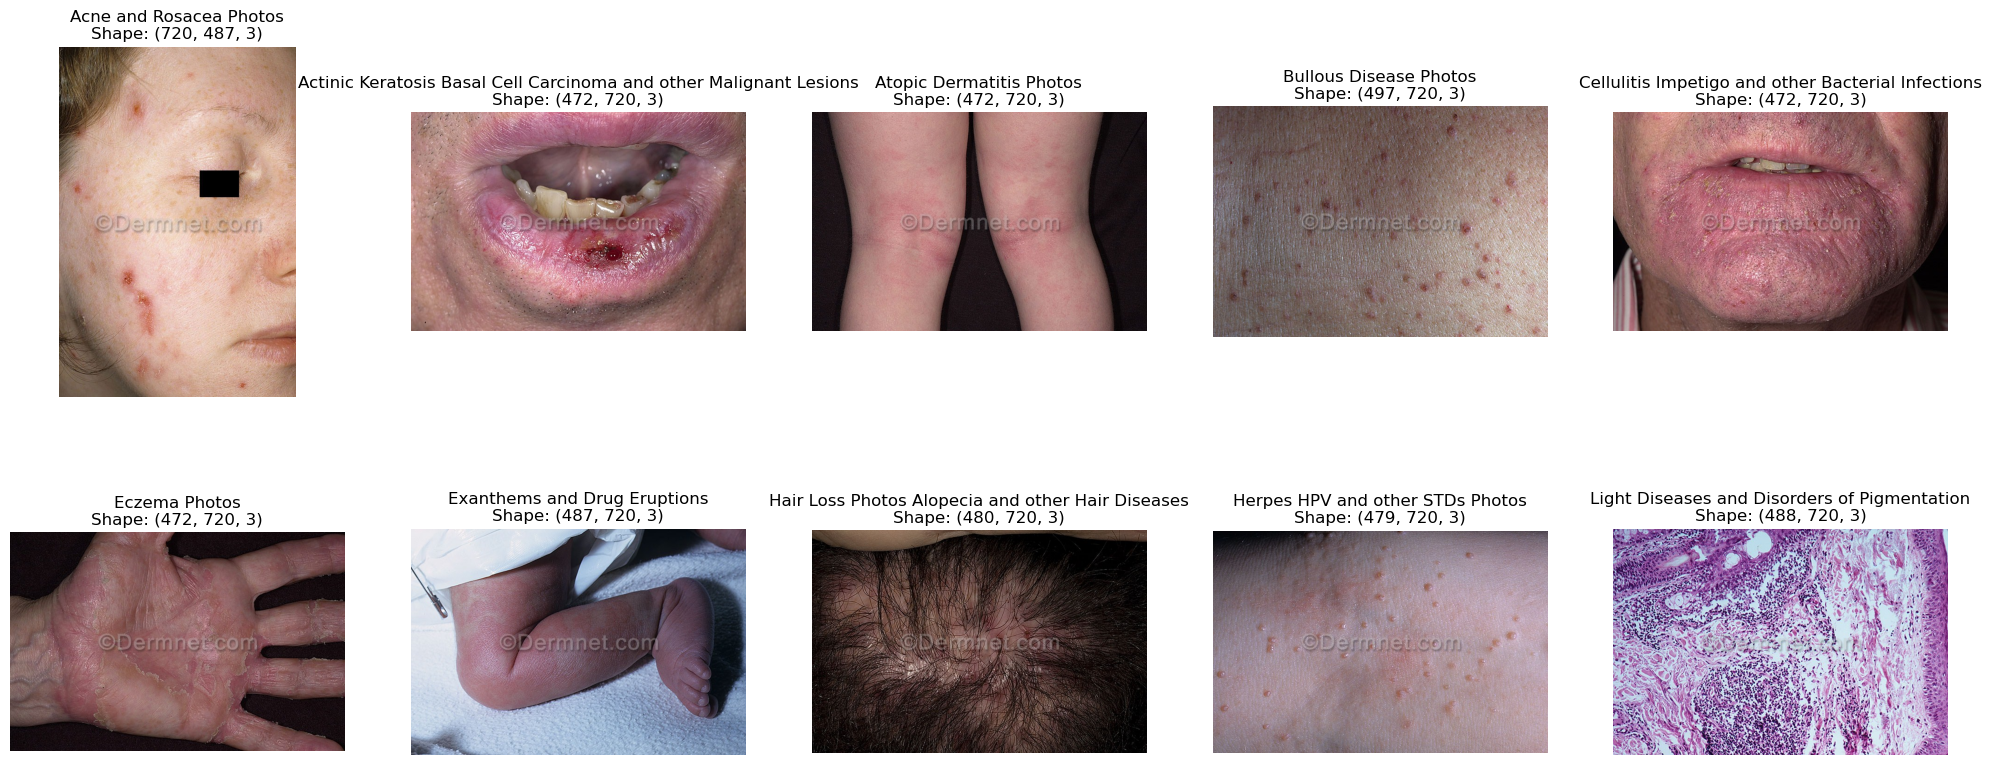

In [15]:
# Set up a subplot with 2 rows and 5 columns
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

# Flatten the 2x5 array of subplots into a 1D array
axs = axs.flatten()

# Loop through each category and plot the shape of one image from that category
for i, categorie in enumerate(CATEGORIES):
    # Get the list of image paths for the current category
    path_train = os.path.join(dir_train, categorie)

    # Select a random image from the category
    random_img = random.sample(os.listdir(path_train), 10)[0]

    # Load the image using matplotlib
    img = plt.imread(os.path.join(path_train, random_img))

    # Get and print the shape of the image
    image_shape = np.shape(img)
    print(f"The shape of the image in category {categorie} is: {image_shape}")

    # Display the image with a title
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"{categorie}\nShape: {image_shape}")

plt.show()

In [5]:
input_shape = (299, 299)

In [7]:
imgs = []
label = []

for categorie in CATEGORIES:
  # path from each categorie
  path_test = os.path.join(dir_test, categorie)
  path_train = os.path.join(dir_train, categorie)

  # save all imgs from each categorie
  for image in os.listdir(path_test):
    images = plt.imread(os.path.join(path_test, image))
    images = cv2.resize(images, input_shape)

    imgs.append(images)
    label.append(CATEGORIES.index(categorie))

  for image in os.listdir(path_train):
    images = plt.imread(os.path.join(path_train, image))
    images = resize(images, input_shape, mode='constant', preserve_range=True)

    imgs.append(images)
    label.append(CATEGORIES.index(categorie))

In [24]:
from collections import Counter

# function to count the number of images in each categorie
def count_label(list):
  occurrences = Counter(list)
  sort_values = dict(sorted(occurrences.items())) # sort the values by index

  for k, value in sort_values.items():
    print(f'{k}: {value}')

print('Total of imagens: ', len(imgs))
print('Images shape: ', imgs[0].shape)
print('Images type: ', imgs[0].dtype)
print('Total of imagens to each categorie:')
count_label(label)


Total of imagens:  4530
Images shape:  (299, 299, 3)
Images type:  uint8
Total of imagens to each categorie:
0: 600
1: 588
2: 423
3: 413
4: 361
5: 600
6: 401
7: 299
8: 402
9: 443


# Categories
* 0
Eczema Photos
* 1
Atopic Dermatitis Photos
* 2
Bullous Disease Photos
* 3
Exanthems and Drug Eruptions
* 4
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
* 5
Acne and Rosacea Photos
* 6
Cellulitis Impetigo and other Bacterial Infections
* 7
Melanoma Skin Cancer Nevi and Moles
* 8
Herpes HPV and other STDs Photos
* 9
Seborrheic Keratoses and other Benign Tumors



In [25]:
target_dict={k: v for v, k in enumerate(np.unique(label))}
target_val=  [target_dict[label[i]]
              for i in range(len(label))]

In [26]:
target_dict

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

# Split dataset in Train, Test, and Validation

Train: 70 %

Test e Validation: 30%

In [8]:
# Getting 30% of the imagens and putting in Test
X_train, X_test, Y_train, Y_test = train_test_split(imgs, label, test_size=0.3, random_state=42, shuffle=True, stratify=label)

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

#Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

# codificacao da saída (one-hot encoding)
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

print('Train size:', len(X_train))
print(X_train.shape)
print('Test size:', len(X_test))
print(X_test.shape)

Train size: 1812
(1812, 299, 299, 3)
Test size: 777
(777, 299, 299, 3)


In [28]:
print('Total of imagens to each categorie in Test:')
count_label(Y_test)

Total of imagens to each categorie in Test:
0: 180
1: 176
2: 127
3: 124
4: 108
5: 180
6: 120
7: 90
8: 121
9: 133


In [29]:
print('Total of imagens to each categorie in Train:')
count_label(Y_train)

Total of imagens to each categorie in Train:
0: 420
1: 412
2: 296
3: 289
4: 253
5: 420
6: 281
7: 209
8: 281
9: 310


# Pré Treinada

In [9]:
from keras.applications import InceptionV3

pre_model = InceptionV3(
  weights='imagenet',
  include_top=False,
  input_shape=(299, 299, 3)
)

pre_model.trainable = False
pre_model.summary()



Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normaliza

# Data Augmentation

In [10]:
seed = 10
data_aug = Sequential(
  [
    layers.RandomFlip("vertical", seed=seed),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
  ]
)

# Model

In [13]:

inputs = keras.Input(shape=(299,299,3))
x = data_aug(inputs)
x = keras.applications.inception_v3.preprocess_input(x)

x = pre_model(x)
# x = Conv2D(filters=512, kernel_size=7, strides = 5, padding='same', activation='relu')(x)
# x = Conv2D(filters=256, kernel_size=7, strides = 5, padding='same', activation='relu')(x)
x = Conv2D(filters=32, kernel_size=7, strides = 5, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=32, kernel_size=3, strides = 2, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=16, kernel_size=3, strides = 2, padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(1, 1))(x)
x = Dropout(0.25)(x)
x = Dense(64, activation='relu')(x)
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# x = BatchNormalization()(x)
# x = Dropout(0.25)(x)

x = Dropout(0.4)(x)
output = Dense(2, activation='sigmoid')(x)

model = keras.Model(inputs, output)

adam = Adam(learning_rate=0.0001)
# adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) # 10x smaller than standard
model.compile(loss='categorical_crossentropy', optimizer=adam,  metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 299, 299, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 299, 299, 3)       0         
 mbda)                                                           
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 conv2d_97 (Conv2D)          (None, 2, 2, 32)          3211

# Treinamento

In [14]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 64, validation_data=(X_test, Y_test))

Epoch 1/10


29/29 [==============================] - 107s 4s/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5547
Epoch 2/10
29/29 [==============================] - 68s 2s/step - loss: 0.6910 - accuracy: 0.5513 - val_loss: 0.6894 - val_accuracy: 0.5547
Epoch 3/10
29/29 [==============================] - 70s 2s/step - loss: 0.6894 - accuracy: 0.5524 - val_loss: 0.6878 - val_accuracy: 0.5547
Epoch 4/10
29/29 [==============================] - 70s 2s/step - loss: 0.6871 - accuracy: 0.5524 - val_loss: 0.6861 - val_accuracy: 0.5547
Epoch 5/10
29/29 [==============================] - 70s 2s/step - loss: 0.6864 - accuracy: 0.5502 - val_loss: 0.6849 - val_accuracy: 0.5547
Epoch 6/10
29/29 [==============================] - 69s 2s/step - loss: 0.6846 - accuracy: 0.5530 - val_loss: 0.6828 - val_accuracy: 0.5547
Epoch 7/10
29/29 [==============================] - 70s 2s/step - loss: 0.6830 - accuracy: 0.5552 - val_loss: 0.6807 - val_accuracy: 0.5547
Epoch 8/10
29/29 

# Acurácia e Loss

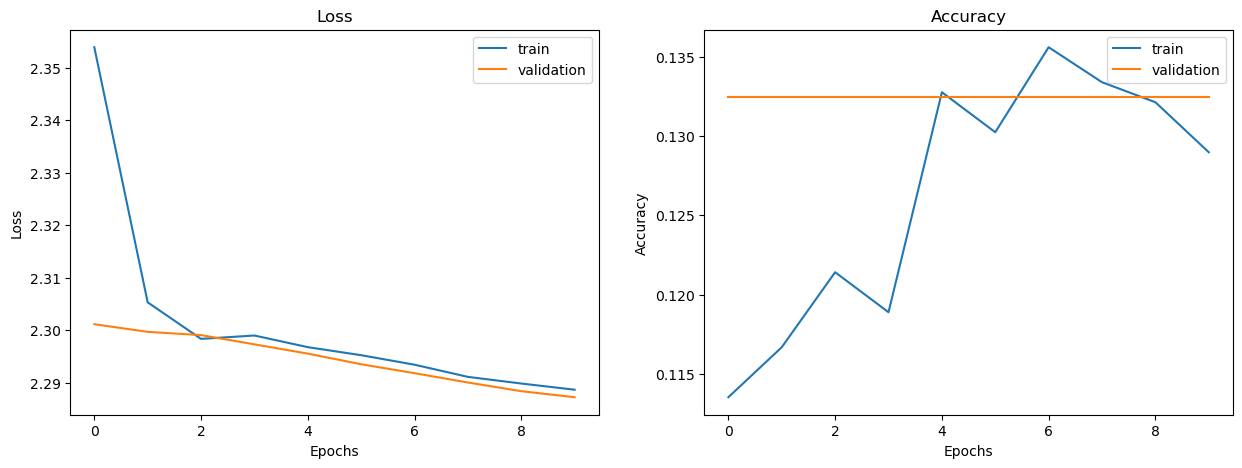

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend();
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend();

In [ ]:
print ('Loss and Accuracy:')
model.evaluate(X_test, Y_test)

Loss and Accuracy:
46/46 [==============================] - 92s 2s/step - loss: 1.6852 - accuracy: 0.4764


[1.6851927042007446, 0.47642162442207336]

# Matriz de Confusão

46/46 [==============================] - 84s 2s/step


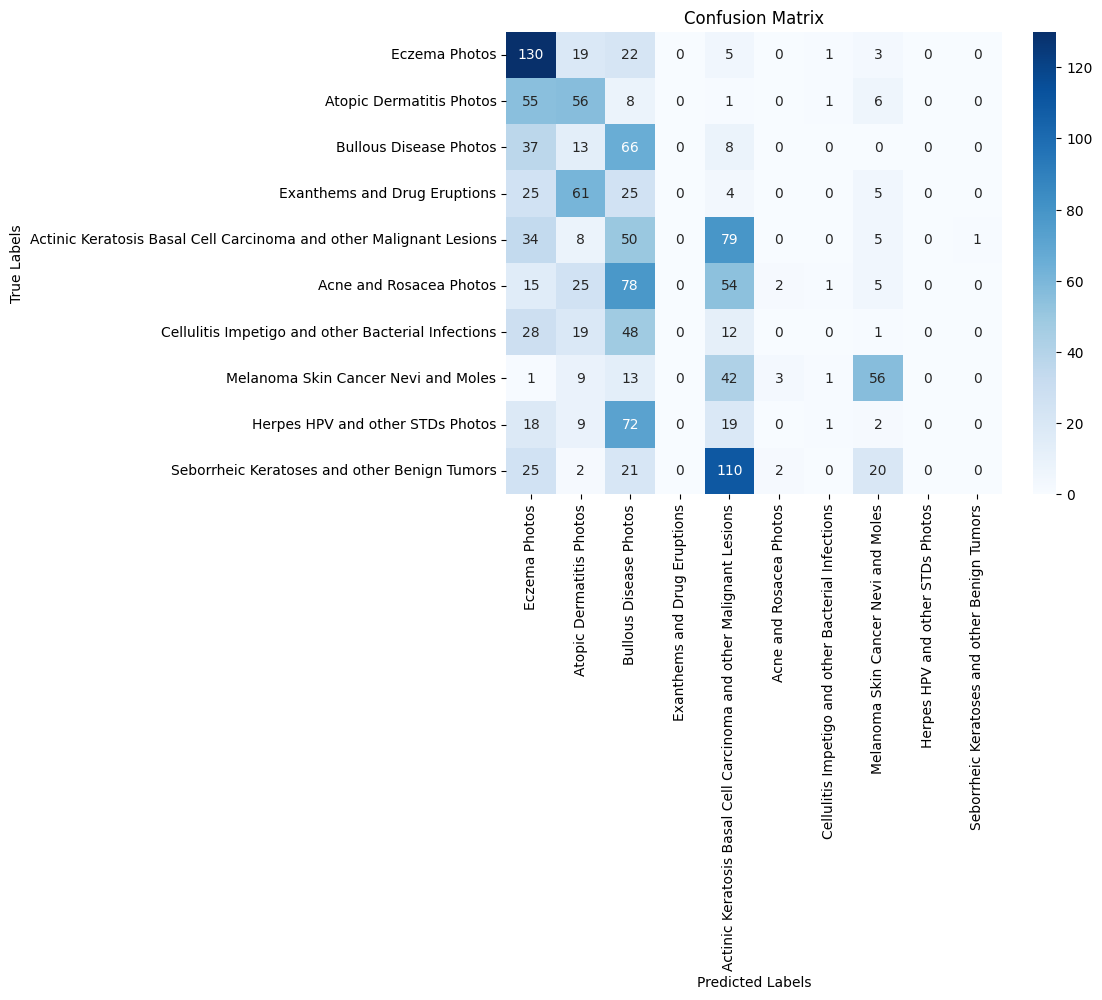

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

cmat=confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
cm_df = pd.DataFrame(cmat)

cmat_df = pd.DataFrame(cmat,
                     index = [CATEGORIES],
                     columns = [CATEGORIES])

plt.figure(figsize=(8,6))
sns.heatmap(cmat_df, annot=True,fmt="d",cmap=plt.cm.Blues )
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
tp = cmat[1][1] # True positive
fp = cmat[0][1] # False positive
tn = cmat[0][0] # True negative
fn = cmat[1][0] # False negative

accuracy = ((tp+tn)*100)/np.sum(cmat)
precision = (tp*100)/(tp+fp)
sensibility = (tp*100/(tp+fn))
specificity = (tn*100)/(fp+tn)

print('Metrics')
print('Accuracy:..........>',accuracy,"%")
print('Precision:..........>',precision,"%")
print('Recall:.....>',sensibility,"%")
print('Specificity:....>',specificity,"%")

plt.show()

Metrics
Accuracy:..........> 12.89875173370319 %
Precision:..........> 74.66666666666667 %
Recall:.....> 50.450450450450454 %
Specificity:....> 87.24832214765101 %


In [ ]:
model.save('/content/MyDrive/MyDrive/artigo_diag/model_inception_dataaug.h5')

# Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ValueError: ignored

# Predictions

In [ ]:
import numpy as np
from PIL import Image


# Load and preprocess the image
img = Image.open("/content/MyDrive/MyDrive/artigo_diag/test/Atopic Dermatitis Photos/05PityriasisAlba0412042.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()